In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
from matplotlib.lines import Line2D
import pandas as pd
from kaldo.phonons import Phonons
from kaldo.forceconstants import ForceConstants
from kaldo.observables.secondorder import SecondOrder
from kaldo.interfaces.shengbte_io import read_second_order_qe_matrix
from scipy import constants as con
# Unit conversions
# THz to cm-1
thz_to_invcm = con.value('hertz-inverse meter relationship')*1e12/100
plt.style.use('/home/nwlundgren/spanners/matsci/miscellaneous/mpltstyle.txt')

2023-11-21 10:00:16.883388: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-21 10:00:16.911275: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/oneapi/mkl/2023.2.0/lib/intel64:/opt/intel/oneapi/compiler/2023.2.0/linux/lib:/opt/intel/oneapi/compiler/2023.2.0/linux/lib/x64:/opt/intel/oneapi/compiler/2023.2.0/linux/compiler/lib/intel64_lin
2023-11-21 10:00:16.911287: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Convergence Information

Text(0.5, 0, 'Vac (A)')

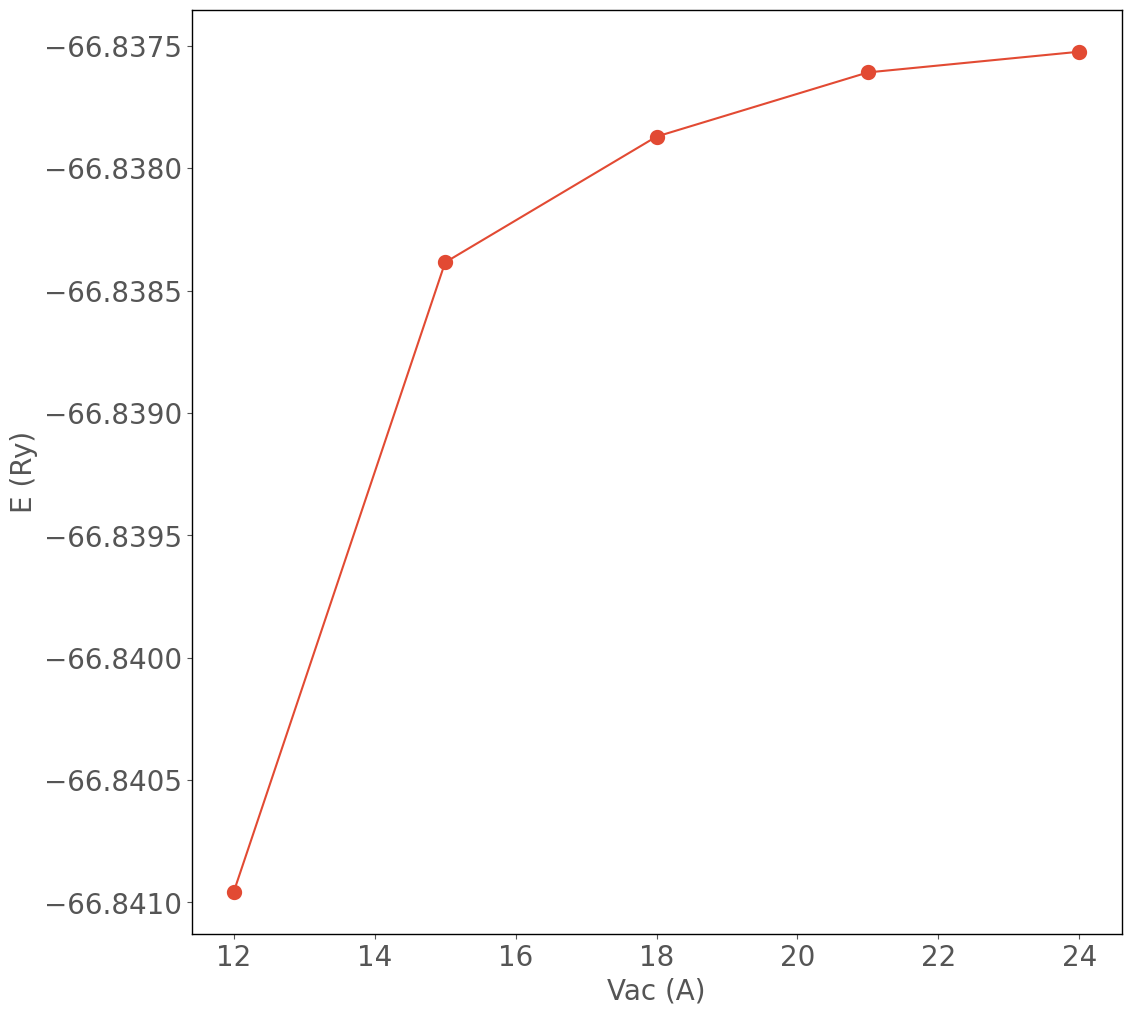

In [27]:
myp = 3
paths = {1:'EvsK.dat',
        2:'EvsWfc.dat',
        3:'EvsVac.dat',}
xlabels = {1:'Kpts (NxNx1 grid)',
        2:'Ecutwfc (Ry)',
        3:'Vac (A)',}
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()

evk = np.loadtxt(f'../inse/ncpp/monolayer/{paths[myp]}')

ax.plot(evk[:,0], evk[:,1])
ax.scatter(evk[:,0], evk[:,1])
ax.set_ylabel('E (Ry)')
ax.set_xlabel(xlabels[myp])

Text(0.5, 0, '$\\vec{k}$')

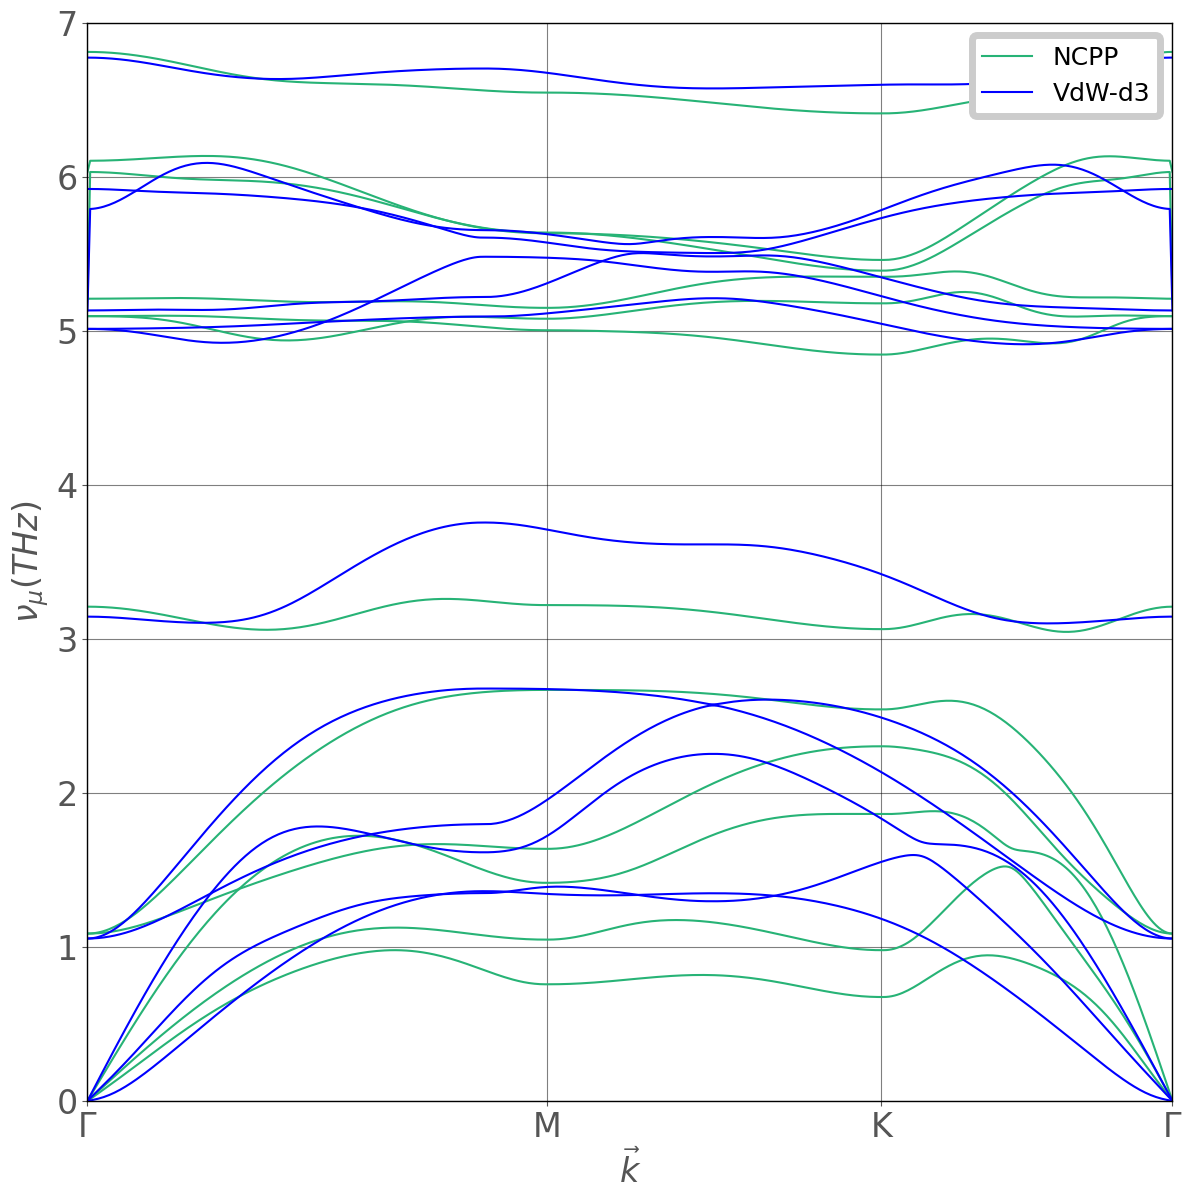

In [47]:
## Plot dispersion relations from QE FREQ.gp files
## Since numpy, and matplotlib is already loaded, we can get started
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot()


# Plot QE generated dispersion
ncpp = np.loadtxt('../inse/ncpp/monolayer/sixtyfive_ry/dynamics-qe/FREQ.gp')

vdw = np.loadtxt('../inse/vdw-d3/monolayer/sixtyfive_ry/dynamics/FREQ.ns.gp')

color = '#27b376' # minty green
for i in range(12):
    ax.plot(np.linspace(0,1, ncpp.shape[0]), ncpp[:, i+1]/thz_to_invcm, color=color)

color = 'b' 
for i in range(12):
    ax.plot(np.linspace(0,1, vdw.shape[0]), vdw[:, i+1]/thz_to_invcm, color=color)
    

# Plot labeling 
sympoints = np.array([0, 169, 292, 399])/399
symlabels = [r'$\Gamma$', 'M', 'K', r'$\Gamma$']

lines=[Line2D([],[],color='#27b376'),
       Line2D([],[],color='b')]
labels=['NCPP', 'VdW-d3']

ax.legend(lines, labels, loc='upper right', fontsize=18)
ax.grid('x', color='k', alpha=0.5, zorder=0)
ax.set_xticks(sympoints, symlabels)
ax.set_ylim([0, 7])
ax.set_xlim([0, 1])
ax.set_ylabel(r'$\nu_{\mu} (THz)$')
ax.set_xlabel(r'$\vec{k}$')
#ax.set_xticks[s]

Text(0.5, 0, '$\\vec{k}$')

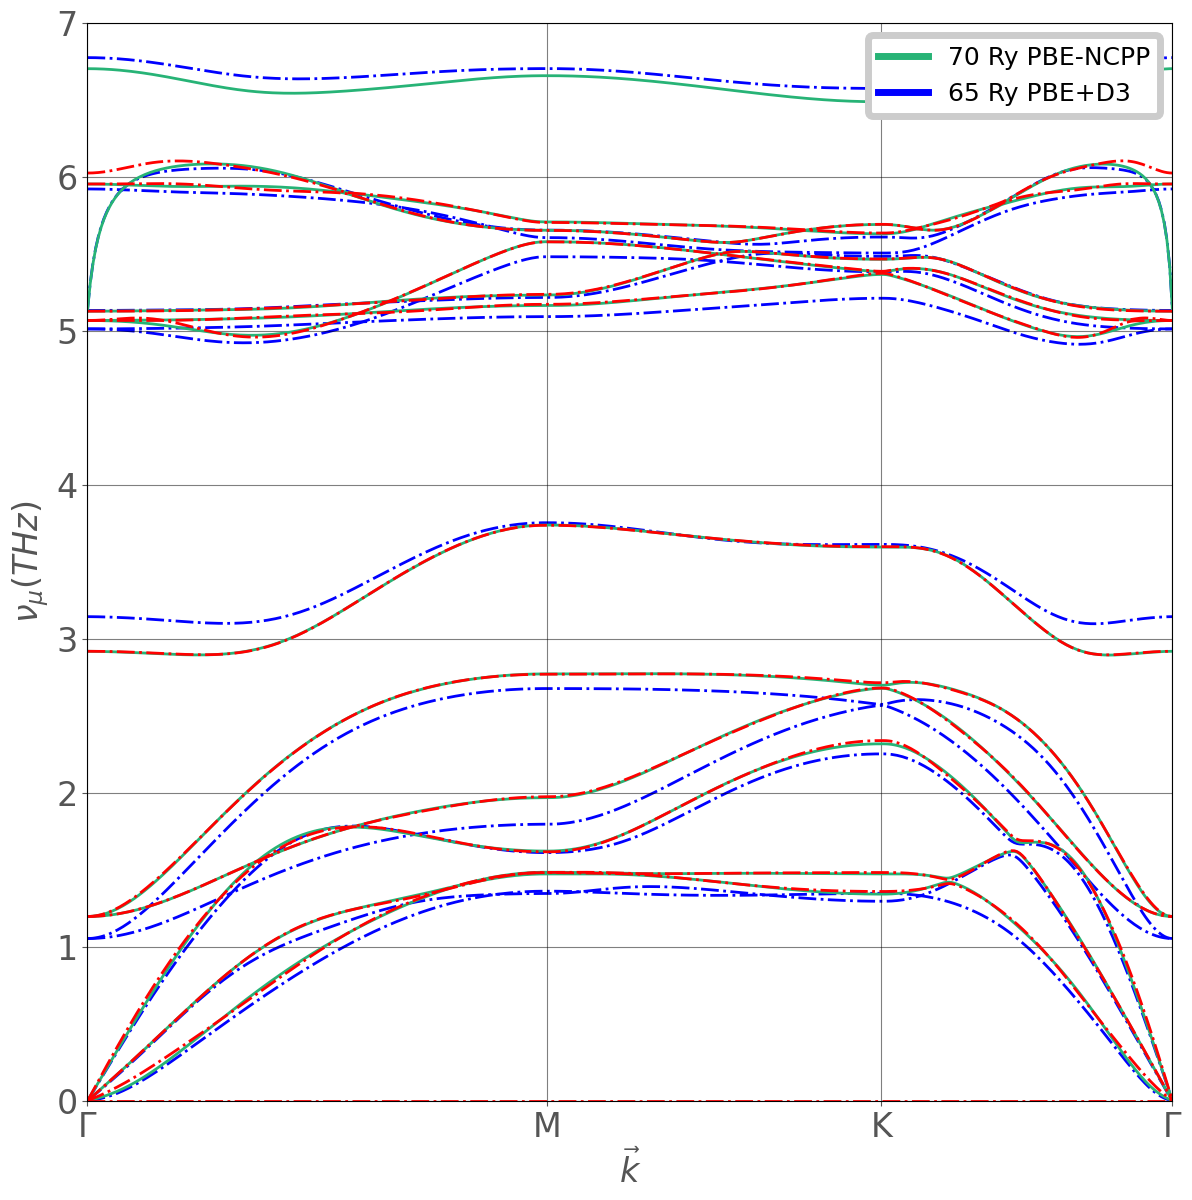

In [9]:
## Plot dispersion relations from QE FREQ.gp files
## Since numpy, and matplotlib is already loaded, we can get started
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot()


# Plot QE generated dispersion
sixty5 = np.loadtxt('../inse/ncpp/monolayer/sixtyfive_ry/dynamics-qe/FREQ.s.gp')

seventy = np.loadtxt('../inse/ncpp/monolayer/seventy_ry/dynamics-qe/FREQ.s.gp')
sevend3 = np.loadtxt('../inse/ncpp/monolayer/seventy_ry/dynamics-d3/freq.out')[:, 4:16]
vdw = np.loadtxt('../inse/vdw-d3/monolayer/dynamics/FREQ.gp')

# color = '#27b376' # minty green
# for i in range(12):
#     ax.plot(np.linspace(0,1, sixty5.shape[0]), sixty5[:, i+1]/thz_to_invcm, linestyle='-.', color=color)

color = '#27b376' 
for i in range(12):
    ax.plot(np.linspace(0,1, seventy.shape[0]), seventy[:, i+1]/thz_to_invcm, lw=2, color=color)
    
color = 'b' 
for i in range(12):
    ax.plot(np.linspace(0,1, vdw.shape[0]), vdw[:, i+1]/thz_to_invcm, linestyle='-.', lw=2, color=color, zorder=0)
    
color = 'r' 
for i in range(12):
    ax.plot(np.linspace(0,1, sevend3.shape[0]), sevend3[:, i]/thz_to_invcm, linestyle='-.', lw=2, color=color)
    

# Plot labeling 
sympoints = np.array([0, 169, 292, 399])/399
symlabels = [r'$\Gamma$', 'M', 'K', r'$\Gamma$']

lines=[Line2D([],[], lw=5, color='#27b376'),
       #Line2D([],[],color='#27b376'),
       Line2D([],[], lw=5, color='b')]
labels=['70 Ry PBE-NCPP', '65 Ry PBE+D3']

ax.legend(lines, labels, loc='upper right', fontsize=18)
ax.grid('x', color='k', alpha=0.5, zorder=0)
ax.set_xticks(sympoints, symlabels)
ax.set_ylim([0, 7])
ax.set_xlim([0, 1])
ax.set_ylabel(r'$\nu_{\mu} (THz)$')
ax.set_xlabel(r'$\vec{k}$')
#ax.set_xticks[s]

In [7]:
seventy.shape

(399, 13)